In [100]:
import numpy as np
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from scipy.special import expit as sigmoid

%matplotlib inline

In [101]:
X, t = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=0, n_clusters_per_class=1)
t=t.reshape(len(t),1)#make 2d

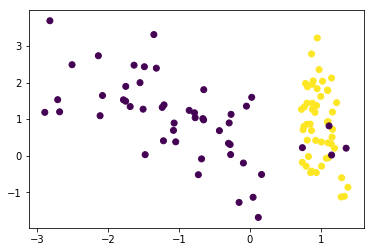

In [102]:
plt.scatter(X[:,1], X[:,0], c=t)

In [103]:

def basis(x):
    """Add a basis function expansion to add ones to the start of x."""
    return np.concatenate([np.ones((x.shape[0],1)), x],axis=1)

def compute_cost(X,y, theta):
    """Compute the loss to monitor convergence"""
    y_hat = sigmoid(X.dot(theta))
    sqErrors = (y_hat-y)**2
    return 0.5*sqErrors.sum()
    

In [104]:
sigmoid(np.random.random((10,1)))#test sigmoid

array([[ 0.55381075],
       [ 0.70262619],
       [ 0.65618817],
       [ 0.60680867],
       [ 0.70602602],
       [ 0.52957091],
       [ 0.59083689],
       [ 0.70830061],
       [ 0.68514691],
       [ 0.63562111]])

In [105]:
phi = basis(X)

In [106]:
w = np.random.random((phi.shape[1],1))

Gradient descent updates are $w = w + \alpha \Phi^{T}(t_{n} - y_{n})$

In [132]:
a = 0.1 #learning rate
n_steps = 900

In [133]:
costs= []
for i in range(n_steps):
    w = w+ a* phi.T.dot(t-sigmoid(phi.dot(w)))
    costs.append(compute_cost(phi,t,w))

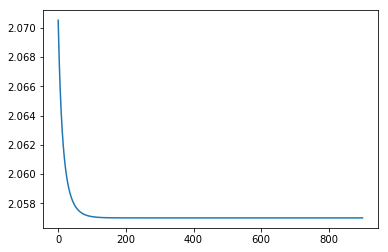

In [134]:
plt.plot(costs)

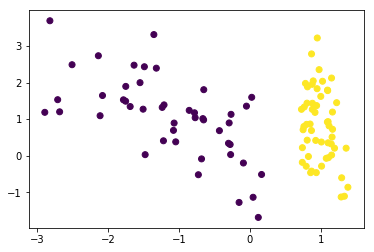

In [136]:
plt.scatter(X[:,1], X[:,0], c=sigmoid(phi.dot(w))>0.5) #plot predictions